# Predicting Heart Disease using machine learning # 

This notebook looks into using various Python-based Machine learning and Ds Libraries in an attempt to build a machine learning model capable of predicting wheter or not someone has heart disease based on their medical attributes

We´re going to take the following approach:

1. Problem definition
   1. In a statement,
      1. Given Clinical Parameters about a patient, can we predict whether or not they have heart disease?
   
2. Data
   1. The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease
   2. There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset
   
3. Evaluation
   1. If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.
   
4. Features
   1. This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).
5. Modelling 
6. Experimentation

Create data dictionary

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape  # (rows, columns)


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

    What question(s) are you trying to solve?
    What kind of data do we have and how do we treat different types?
    What's missing from the data and how do you deal with it?
    Where are the outliers and why should you care about them?
    How can you add, change or remove features to get more out of your data?



In [ ]:
df.head(10)  # first 10 rows

In [ ]:
df['target'].value_counts()  # count of target variable

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count") 


In [ ]:
df.info()  # information about the dataset

In [ ]:
df.isna().sum()  # check for missing values

In [ ]:
df.describe()  # statistical information about the dataset

## Finding Patterns

### Heart Disease Frequency according to Sex

In [ ]:
df.sex.value_counts()

In [ ]:
# Compare Target Column with sex Column
pd.crosstab(df.target, df.sex)

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", 'Male'])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color='salmon')

# Scatter with negative examples
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue')
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()


In [ ]:
# Check the distribution of the age column with a histogram
plt.figure(figsize=(10, 6))
plt.hist(df.age, bins=30, color='salmon')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Heart Disease Frequency per Chest Pain 

cp - chest pain type

        - 0: Typical angina: chest pain related decrease blood supply to the heart
        - 1: Atypical angina: chest pain not related to heart
        - 2: Non-anginal pain: typically esophageal spasms (non heart related)
        - 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.target, df.cp)

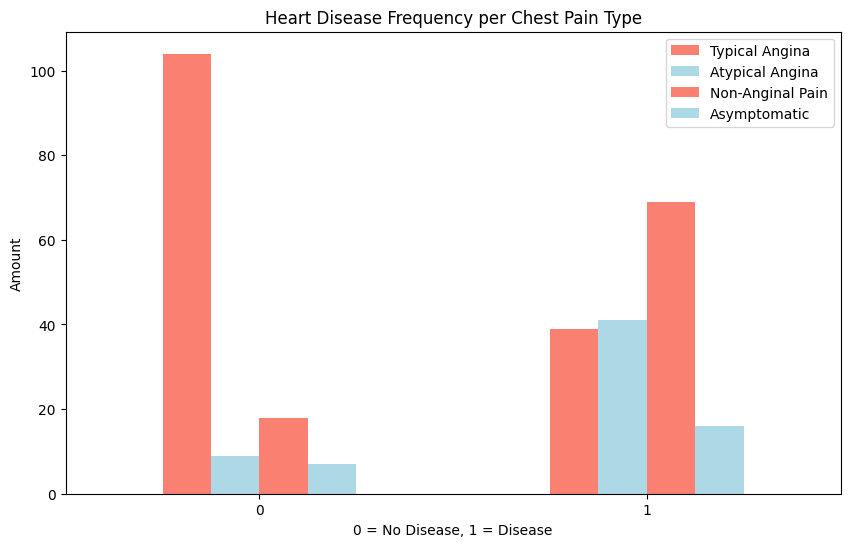

In [21]:
# Make the crosstab more visual
pd.crosstab(df.target, df.cp).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10, 6))
plt.title("Heart Disease Frequency per Chest Pain Type") 
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"])
plt.xticks(rotation=0);
